# **FEACTURE ENGINEERING**
# Preprocesamiento y preparación de los datos

# **CONFIGURACIÓN DEL ENTORNO**

##**1. Conexión a drive :** 
Todo el preprocesamiento se realizó usando conexiones con drive en el ambiente de google Colab

In [1]:
# Conexión con google para acceder a los documentos en drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**2. Instalación de librerías :** 
Instalación de librerías que no estan instaladas por default en Colab

In [2]:
# Actualización de sklearn
!pip install -U scikit-learn 
## modelo de idioma español de spacy
!python -m spacy download es_core_news_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2023-05-18 00:45:42.783779: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-18 00:45:43.927351: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 52.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


##**3. Importar librerías :** 
Importar librerías necesarias para las tareas de preprocesamiento

In [3]:
# 1. Tratamiento y visualización de datos
# ==============================================================================
## Manipulación de datos
import pandas as pd 
## Cálculos númericos
import numpy as np
## Visualización de datos
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Preparación de los datos
# ==============================================================================
## Procesamiento de Lenguaje Natural
import nltk
from nltk.corpus import stopwords 
## Corpus de nltk para 'tokenizer', 'stopwords' y 'words' (diccionarios)
nltk.download('punkt') # Tokenización
nltk.download('stopwords') # Diccionario de palabras comunes
nltk.download('words') # Diccionario de palabras en ingles aceptables
nltk.download('wordnet') # Diccionario para lematización
nltk.download('omw-1.4') # Diccionario para lematización multilingue
## Uso de expresiones regulares
import re
##Stemming y Lematización
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
import spacy
import unicodedata
## Matriz de frecuencias
from sklearn.feature_extraction.text import TfidfVectorizer
## nube de palabras
from wordcloud import WordCloud
## n-grams
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


##**4. Organización de los datos:** 
Los datos vienen en formato TXT, es necesario unificarlos para construir un dataframe que pueda ser manipulable.
11771 registros de correo electrónico, para efecto de la entrega y por confidencialidad solo se proporciona en los datos crudos el cuerpo de los correos ya organizados. Se deja comentarios sobre el proceso de organización. Y se toma como base de datos crudos el raw_data.csv

Extraer los archivos en una carpeta

In [4]:
# import zipfile

# # Abrir el archivo zip
# with zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/proyecto de minería/Bronce - Raw Data/Emails PE.zip', 'r') as zip_ref:
#     # Extraer los archivos a una carpeta en Google Colab
#     zip_ref.extractall('/content/drive/MyDrive/Colab Notebooks/Proyecto de Grado/Bronce - Raw Data/correos_ZIP')

In [5]:
# import os
# import pandas as pd

# # Ubicación de la carpeta que contiene los documentos .txt
# folder_path = '/content/drive/MyDrive/Colab Notebooks/correos_ZIP/Emails PE'

# # Unir todos los documentos .txt en la carpeta
# docs = []
# for filename in os.listdir(folder_path):
#     if filename.endswith('.txt'):
#         with open(os.path.join(folder_path, filename), 'r') as f:
#             docs.append({'Autor': filename, 'contenido': f.read()})

Unir los archivos en un dataframe

In [6]:
# # Crear un DataFrame a partir de la lista de documentos
# df = pd.DataFrame(docs)
# # Asignar Pais y usuario
# df['Usuario'] = 'Inversionista'
# df.head()

##**5. Lectura de datos crudos (ZONA BRONCE):** 
Datos crudos con los que se realizará el preprocesamiento


In [7]:
#df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/proyecto de minería/Bronce - Raw Data/correos_ZIP/df1.csv') # 124 @likideo 6 @Facturedo eliminar registros
#df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/proyecto de minería/Jobs/Repositorio de analitica/Data/1. Bronce/raw_data.csv')
# Crear una máscara booleana para identificar los registros que contienen la palabra "@likideo y @facturedo porque son correos del equipo interno"
#mask1 = df["Autor"].str.contains("@likideo")
#mask2 = df["Autor"].str.contains("@facturedo")
#mask3 = df["Autor"].str.contains("Subject") Quitar los asuntos
# Eliminar los registros correspondientes utilizando la máscara booleana
#df = df.drop(df[mask1].index)
#df = df.drop(df[mask2].index)
#df = df.drop(df[mask3].index)

#df.head(5)

In [8]:
# Zona Bronce: guardar dataframe en archivo csv
#df.to_csv('/content/drive/MyDrive/Colab Notebooks/proyecto de minería/Jobs/Repositorio de analitica/Data/1. Bronce/raw_data.csv', index=False)
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/proyecto de minería/Jobs/Repositorio de analitica/Data/1. Bronce/raw_data.csv')
df.head(5)

Autor  \
0  Body_ from Elizabeth Guisado T. _afrodita_8521...   
1  Body_ from Gustavo Virgilio Olazabal Mendoza _...   
2  Body_ from Carlos Santa Cruz Davinson _csantac...   
3  Body_ from Renato Urbina _renatoramosborjas@gm...   
4  Body_ from Hugo Villanueva Castillo _villanuev...   

                                           contenido        Usuario  
0  Buenas tardes.Les escribo el presente correo p...  Inversionista  
1  Buenas tardes,Sobre este pago de factura, veo ...  Inversionista  
2  Hola,\n\nIngenicorp SAC (20603517726).\n\nPor ...  Inversionista  
3  Buenas tardes.\n\nLes escribo el presente corr...  Inversionista  
4  La consulta fue resuelta en su mayoría, entre ...  Inversionista

In [9]:
# Filtrar filas que contengan "ejemplo" en la columna "texto"
filtro = df[df['Autor'].str.contains('Subject')]

print(len(filtro))
# Imprimir DataFrame filtrado
filtro.head(1000)

0


Empty DataFrame
Columns: [Autor, contenido, Usuario]
Index: []

# **FEATURE ENGINEERING**

**1. Limpieza de datos:** Eliminar caracteres no deseados, corregir errores ortográficos, convertir todo el texto a minúsculas o mayúsculas, etc.

Definir una función para preparación de datos

In [10]:
#Importar Diccionario nltk.corpus
stop_words_nltk = list(stopwords.words('spanish'))
#Adición de stopwords al diccionario (nombre de la empresa y demás nombres que no aportan)
stop_words_nltk.extend(('cordial','cordiales','quedo','quedamos','atento','atentos','favor','rv','image','logo','png','2022','2023','pe','sac','facturedo','da','re','buenas','buenos','hola','status','m','dias','tardes','noches','saludos','saludo','gracias','si','id','escribi','re', 'fw', 'fwd', 'http', 'https', 'www', 'com', 'es', 'para', 'de', 'en', 'y', 'o', 'u', 'que', 'del', 'el', 'la', 'los', 'las', 'un', 'una', 'unos', 'unas', 'con', 'sin','facturedope', 'activado', 'lun', 'mar','mie','jue','vie','sab','dom','equipo','contacto'))
# Palabras sin sentido
stop_words_nltk.extend(('ing','image','quot', 'div','style','sansserif','helvetica','arial', 'span', 'roboto', 'neue','ui', 'segoe', 'applesystem', 'blinkmacsystemfont', 'fontfamily', 'br','td','dir','asunto'))
# Stopwords de inglés
stop_words_nltk.extend(list(stopwords.words('english')))

**Observación:** Verá algunas palabras que se quitaron despues de observar la grafica de frecuencia e identificar que no dan ningún aporte a el analisis como "cordiales", " atentos" etc es importante mencionar que en un analisis inicial se visualizaron un gran numero de palabras que correspondian codigo HTML y CSS ya que es común encontrar imagenes como logos u otras que no agregan valor dentro del analisis y alcance, estas fueron eliminadas mejorando el proceso de obtención de datos, desde la fuente en la descarga

In [11]:
#Tokenización,remoción de stopwords, caracteres especiales, unificación a minuscula, stemming y lematización en español
snowball = SnowballStemmer(language = 'spanish')
wordnet_lemmatizer = WordNetLemmatizer()

# Cargar el modelo de idioma español de spacy
nlp = spacy.load('es_core_news_sm')

def textprep(line):
    # Separación de oraciones a palabras
    tokens = nltk.word_tokenize(str(line))
    
    # Pasar de Mayusculas a Minusculas
    tokens = [w.lower() for w in tokens if len(w)>1]
    
    # Quitar caracteres especiales
    tokens = [unicodedata.normalize('NFKD', w).encode('ASCII', 'ignore').decode('utf-8') for w in tokens]
    tokens = [re.sub(r'[^A-Za-z0-9]+','',w) for w in tokens]
    tokens = [re.sub(r"[,@\?\.$%_]",'',w) for w in tokens]
    tokens = [re.sub(r'\S+@\S+', '',w) for w in tokens]
    tokens = [re.sub(r'\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\(\d{3}\)\s*\d{3}[-\.\s]??\d{4}|\d{3}[-\.\s]??\d{4}', '',w) for w in tokens]
    
    # Eliminar Stopwords
    tokens = [w for w in tokens if w not in stop_words_nltk]
    
    # Lematizar cada palabra del texto usando spacy
    doc = nlp(" ".join(tokens))
    tokens = [token.lemma_ for token in doc]
    
    return tokens

In [12]:
# creación de columna en el dataframe con los datos preparados
df['tokens_Contenido'] = df.apply(lambda row: textprep(row['contenido']), axis=1) #Adición de columna
df['corpus_Contenido'] = df['tokens_Contenido'].apply(lambda tokens: ' '.join(tokens))
df.head(5)

Autor  \
0  Body_ from Elizabeth Guisado T. _afrodita_8521...   
1  Body_ from Gustavo Virgilio Olazabal Mendoza _...   
2  Body_ from Carlos Santa Cruz Davinson _csantac...   
3  Body_ from Renato Urbina _renatoramosborjas@gm...   
4  Body_ from Hugo Villanueva Castillo _villanuev...   

                                           contenido        Usuario  \
0  Buenas tardes.Les escribo el presente correo p...  Inversionista   
1  Buenas tardes,Sobre este pago de factura, veo ...  Inversionista   
2  Hola,\n\nIngenicorp SAC (20603517726).\n\nPor ...  Inversionista   
3  Buenas tardes.\n\nLes escribo el presente corr...  Inversionista   
4  La consulta fue resuelta en su mayoría, entre ...  Inversionista   

                                    tokens_Contenido  \
0  [tardesl, escribir, presente, correo, notifica...   
1  [pago, factura, ver, opcion, movimiento, pago,...   
2  [ingenicorp, 6, solo, correo, whatsapp, linked...   
3  [escribir, presente, correo, notificarl, probl...   
4  [consulta, resuelto, mayorio, cosa, indicar, h...   

                                    corpus_Contenido  
0  tardesl escribir presente correo notificarl pr...  
1  pago factura ver opcion movimiento pago 32250 ...  
2  ingenicorp 6 solo correo whatsapp linkedin car...  
3  escribir presente correo notificarl problema i...  
4  consulta resuelto mayorio cosa indicar hacer a...

**2. Analisis de características:** longitud de texto (numero de palabras, número de caracteres), frecuencia de palabras, nube de palabras,n-grams 

longitud de texto (numero de palabras, número de caracteres)

In [13]:
df['num_caracteres'] = df['corpus_Contenido'].apply(lambda x: sum(len(word) for word in x))
df['num_palabras'] = df['corpus_Contenido'].apply(lambda x: len(x.split()))
df.head(5)

Autor  \
0  Body_ from Elizabeth Guisado T. _afrodita_8521...   
1  Body_ from Gustavo Virgilio Olazabal Mendoza _...   
2  Body_ from Carlos Santa Cruz Davinson _csantac...   
3  Body_ from Renato Urbina _renatoramosborjas@gm...   
4  Body_ from Hugo Villanueva Castillo _villanuev...   

                                           contenido        Usuario  \
0  Buenas tardes.Les escribo el presente correo p...  Inversionista   
1  Buenas tardes,Sobre este pago de factura, veo ...  Inversionista   
2  Hola,\n\nIngenicorp SAC (20603517726).\n\nPor ...  Inversionista   
3  Buenas tardes.\n\nLes escribo el presente corr...  Inversionista   
4  La consulta fue resuelta en su mayoría, entre ...  Inversionista   

                                    tokens_Contenido  \
0  [tardesl, escribir, presente, correo, notifica...   
1  [pago, factura, ver, opcion, movimiento, pago,...   
2  [ingenicorp, 6, solo, correo, whatsapp, linked...   
3  [escribir, presente, correo, notificarl, probl...   
4  [consulta, resuelto, mayorio, cosa, indicar, h...   

                                    corpus_Contenido  num_caracteres  \
0  tardesl escribir presente correo notificarl pr...             208   
1  pago factura ver opcion movimiento pago 32250 ...             686   
2  ingenicorp 6 solo correo whatsapp linkedin car...            1634   
3  escribir presente correo notificarl problema i...             194   
4  consulta resuelto mayorio cosa indicar hacer a...             664   

   num_palabras  
0            27  
1            93  
2           203  
3            26  
4            76

In [14]:
# Filtrar filas que contengan "ejemplo" en la columna "texto"
filtro = df[df['corpus_Contenido'].str.contains('contacto contacto')]

print(len(filtro))
# Imprimir DataFrame filtrado
filtro.head(1000)

0


Empty DataFrame
Columns: [Autor, contenido, Usuario, tokens_Contenido, corpus_Contenido, num_caracteres, num_palabras]
Index: []

In [15]:
# ZONA PLATA: Guardar dataframe construido del analisis
#df.to_csv('/content/drive/MyDrive/Colab Notebooks/proyecto de minería/Jobs/Repositorio de analitica/Data/2. Plata/datos_preprocesados.csv', index=False)
#df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/proyecto de minería/Jobs/Repositorio de analitica/Data/2. Plata/datos_preprocesados.csv',)
#df.head(5)


Frecuencia de términos

In [16]:
list_tokens = df['tokens_Contenido'].to_list() #Convertir los "Clean Tokens" de la Matriz en lista
print(type(list_tokens)) #Tenemos una lista de Tokens
li_token_lists_flat = [y for x in list_tokens for y in x]  #Aplanar la lista de lista en una sola lista concatenada
print(list_tokens[5])

<class 'list'>
['empresa', 'pagado', 'cuota', 'recibido', 'dicho', 'pago', 'gb', 'tuesday', 'august', '060209', 'gmt5', 'wrote', 'nuevo', 'nota', 'cobranza', 'gustavo', 'informamo', 'existir', 'nuevo', 'nota', 'cobrancer', 'inversión', 'deudor', 'bio', 'energy', 'peru', 'inversion', '200000', 'usd', 'nota', 'cobranza', 'tomo', 'empresa', 'deudoro', 'acordo', 'cronograma', 'pago', 'cinco', 'cuota', 'mensual', 'mismo', 'finalizar', 'mes', 'octubre', 'presente', 'ano', 'fecha', 'realizado', 'pago', 'segundo', 'cuota', 'informar', 'proximos', 'pago', 'ver', 'detalle', 'inversion', 'atentamente', 'llamano', '51', '739', '7913', 'escribeno', 'sigueno', 'marca', 'registrado', 'derecho', 'reservado']


[('pago', 9461), ('empresa', 8055), (' ', 6399), ('cobranza', 5892), ('escribio', 5703), ('factura', 5646), ('poder', 5504), ('operación', 5074), ('operacion', 4984), ('fecha', 4429), ('informacion', 3694), ('proceso', 3564), ('consulta', 3536), ('acuerdo', 3497), ('encontrar', 3448), ('nota', 3197), ('buen', 3148), ('correo', 3042), ('mas', 3040), ('inversion', 3035), ('plataforma', 2996), ('respuesta', 2904), ('caso', 2899), ('ser', 2793), ('realizar', 2701), ('contar', 2696), ('cuenta', 2458), ('hacer', 2447), ('adicional', 2434), ('estimado', 2415), ('pendiente', 2407), ('p', 2367), ('deudor', 2367), ('esperar', 2320), ('mismo', 2216), ('enviado', 2170), ('diar', 2135), ('dia', 2123), ('gmailcom', 2104), ('alguno', 2062), ('trav', 1993), ('mucho', 1985), ('comunicacion', 1982), ('pen', 1976), ('peru', 1969), ('4', 1862), ('nuevo', 1846), ('informar', 1799), ('inversionista', 1755), ('parte', 1709), ('judicial', 1655), ('comentamos', 1647), ('monto', 1641), ('tener', 1640), ('ultimo

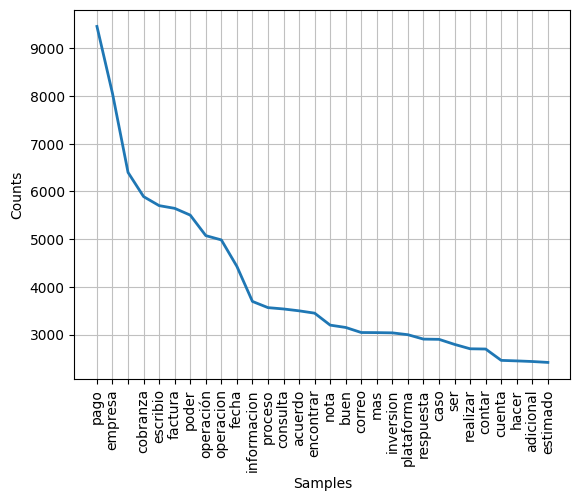

<Axes: xlabel='Samples', ylabel='Counts'>

In [17]:
# Frequency Plot
di_freq = nltk.FreqDist(li_token_lists_flat)
del di_freq['']
li_freq_sorted = sorted(di_freq.items(), key=lambda x: x[1], reverse=True)  # Ordenar la lista
print(li_freq_sorted)
print(type(li_freq_sorted))   
di_freq.plot(30, cumulative=False)

In [18]:
print(type(list_tokens))

<class 'list'>


In [19]:
# ZONA PLATA: Guardar dataframe construido del analisis para el analisis de tópicos

#lista_tokens = pd.DataFrame({'tokens': list_tokens})  
#lista_tokens.to_csv('/content/drive/MyDrive/Colab Notebooks/proyecto de minería/Jobs/Repositorio de analitica/Data/2. Plata/list_tokens.csv', index=False)
#lista_tokens=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/proyecto de minería/Jobs/Repositorio de analitica/Data/2. Plata/list_tokens.csv',)
#print(type(lista_tokens))
#lista_tokens.head(5)

nube de palabras

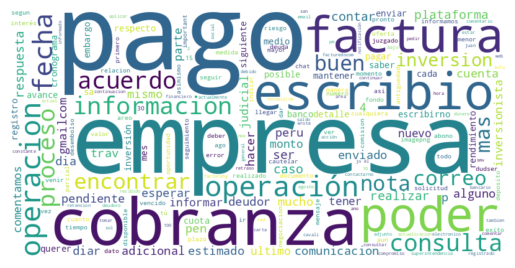

In [20]:
word_freq = {word: freq for word, freq in di_freq.items() if freq > 1}

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Mostrar la nube de palabras
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Analisis de n-grams

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

def get_ngrams(descriptions, n=None):
    
    vec = CountVectorizer(ngram_range = (2,2), max_features = 20000).fit(descriptions) # cambiar rango a (3,3)para trigrams etc
    bag_of_words = vec.transform(descriptions)
    sum_words = bag_of_words.sum(axis = 0) 
    words_freq = [(word, sum_words[0, i]) for word, i in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse = True)
   
    return words_freq[:n]


In [22]:
ngrams = get_ngrams(df['corpus_Contenido'], n=15)
ngrams_df = pd.DataFrame(ngrams)
ngrams_df.columns=["ngram", "Frequency"]

In [23]:
ngrams_df

ngram  Frequency
0        nota cobranza       2728
1             buen dia       1874
2        escribio buen       1709
3   consulta adicional       1416
4    gmailcom escribio       1305
5            trav nota       1250
6            buen diar       1063
7      medida cautelar       1047
8      alguno consulta       1009
9     adicional dudser       1002
10    proceso judicial        930
11          fecha pago        881
12      comision exito        774
13     empresa deudoro        760
14     cronograma pago        726